# **PART-1 KNN**

In [0]:
import numpy as np
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
import keras as keras
from keras.models import Sequential
from keras.models import Model
from sklearn.cluster import KMeans

from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.layers import Dense,Input
import numpy as np
import matplotlib.pyplot as plt


In [0]:

def acc(y_true, y_pred):
    
    y_true = y_true.astype(np.int64)
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    from sklearn.utils.linear_assignment_ import linear_assignment
    ind = linear_assignment(w.max() - w)
    return sum([w[i, j] for i, j in ind]) * 1.0 / y_pred.size

In [0]:
def data(X_labels, cluster_labels):
      predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [0]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')
def cluster(kmeans, actual_labels):
    inferred_labels = {}
    for i in range(10):
        labels = []
        index = np.where(kmeans.labels_ == i)
        labels.append(actual_labels[index])
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]        
    return inferred_labels  



In [32]:

kmeans = KMeans(
    n_clusters=10, init='k-means++',
    n_init=10,max_iter=300, 
    tol=1e-10, random_state=42,verbose = 1
)
y_pred = kmeans.fit_predict(x_train)


Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2082881.6
start iteration
done sorting
end inner loop
Iteration 1, inertia 1989894.1
start iteration
done sorting
end inner loop
Iteration 2, inertia 1969506.0
start iteration
done sorting
end inner loop
Iteration 3, inertia 1956548.5
start iteration
done sorting
end inner loop
Iteration 4, inertia 1949143.5
start iteration
done sorting
end inner loop
Iteration 5, inertia 1944227.5
start iteration
done sorting
end inner loop
Iteration 6, inertia 1939974.9
start iteration
done sorting
end inner loop
Iteration 7, inertia 1936887.0
start iteration
done sorting
end inner loop
Iteration 8, inertia 1934812.9
start iteration
done sorting
end inner loop
Iteration 9, inertia 1933035.6
start iteration
done sorting
end inner loop
Iteration 10, inertia 1931150.4
start iteration
done sorting
end inner loop
Iteration 11, inertia 1929399.2
start iteration
done sorting
end inner loop
Iteration 12, inertia 1927832.

In [0]:
cluster_labels = cluster(kmeans, y_train)
predicted_Y = data(kmeans.labels_, cluster_labels)


In [35]:
from sklearn import metrics
kmeans_acc = metrics.accuracy_score(y_train, predicted_Y)
print(kmeans_acc)

0.5534


# **PART - 2 AUTO ENCODER FOR KNN**


In [1]:
from keras.datasets import fashion_mnist

import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K
from keras.optimizers import SGD
from keras.layers import Dense, Input
from sklearn import metrics
from keras.initializers import VarianceScaling
from imageio import imread
from sklearn.metrics import accuracy_score, normalized_mutual_info_score
from keras.engine.topology import Layer, InputSpec
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:

from time import time
from sklearn.cluster import KMeans
from keras import callbacks
from keras.models import Model


In [0]:
(train_x, train_y), (val_x, val_y) = fashion_mnist.load_data()

In [0]:
x_train = train_x/255.
x_val = val_x/255.


In [0]:

x_train = x_train.reshape(-1, 784)
x_val = x_val.reshape(-1, 784)


In [6]:
input_img = Input(shape=(784,))


In [0]:

encoded = Dense(2000, activation='relu')(input_img)
encoded = Dense(1000, activation='relu')(encoded)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(10, activation='sigmoid')(encoded)

In [0]:

decoded = Dense(500, activation='relu')(encoded)
decoded = Dense(1000, activation='relu')(decoded)
decoded = Dense(2000, activation='relu')(decoded)
decoded = Dense(784)(decoded)

In [43]:
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2000)              1570000   
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_11 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5010      
_________________________________________________________________
dense_13 (Dense)             (None, 500)               5500      
_________________________________________________________________
dense_14 (Dense)             (None, 1000)              5010

In [0]:
encoder = Model(input_img, encoded)


In [11]:
autoencoder.compile(optimizer='adam',
                      loss='mse',
                      metrics=['accuracy'])

earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
train_history = autoencoder.fit(x_train, x_train, epochs=200, batch_size=64, validation_data=(x_val, x_val), callbacks=[earlystop])





Train on 60000 samples, validate on 10000 samples
Epoch 1/200





60000/60000 [==============================] - 7s 113us/step - loss: 0.0296 - acc: 0.0127 - val_loss: 0.0198 - val_acc: 0.0169
Epoch 2/200
60000/60000 [==============================] - 5s 90us/step - loss: 0.0180 - acc: 0.0181 - val_loss: 0.0169 - val_acc: 0.0175
Epoch 3/200
60000/60000 [==============================] - 5s 91us/step - loss: 0.0158 - acc: 0.0224 - val_loss: 0.0152 - val_acc: 0.0231
Epoch 4/200
60000/60000 [==============================] - 5s 89us/step - loss: 0.0147 - acc: 0.0269 - val_loss: 0.0144 - val_acc: 0.0232
Epoch 5/200
60000/60000 [==============================] - 5s 89us/step - loss: 0.0141 - acc: 0.0303 - val_loss: 0.0140 - val_acc: 0.0337
Epoch 6/200
60000/60000 [==============================] - 5s 88us/step - loss: 0.0136 - acc: 0.0318 - val_loss: 0.0135 - val_acc: 0.0242
Epoch 7/200
60000/60000 [==============================] - 6s 93us/step - loss: 0.0132 - acc: 0.0337 - val_loss:

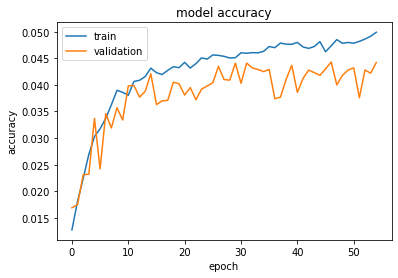

In [12]:

#  "Accuracy"
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


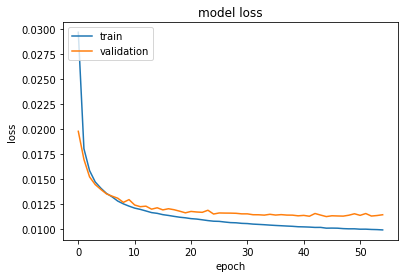

In [13]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [0]:
import 
def infer_cluster(kmeans, actual_labels):
    inferred_labels = {}
    for i in range(10):
        label = []
        index = np.where(kmeans.labels_ == i)
        label.append(actual_labels[index])
        if len(label[0]) == 1:
            counts = np.bincount(label[0])
        else:
            counts = np.bincount(np.squeeze(label))
        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]
    return inferred_labels  

def infer_data(X_labels, cluster_labels):
    predict_label = np.zeros(len(X_labels)).astype(np.uint8)  
    for i, clusters in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if clusters in value:
                predict_label[i] = key             
    return predict_label

In [0]:
encoder = keras.backend.function([autoencoder.layers[0].input],[autoencoder.layers[4].output]) 
encoded_image = encoder([x_train])[0].reshape(-1,10)
km = KMeans(
      n_clusters=10, init='k-means++',
      n_init=10, max_iter=200,
      tol=1e-10, random_state=10
  )
y_km  = km.fit_predict(encoded_image)

cluster_labels = infer_cluster(km, train_y)
predicted_Y = infer_data(km.labels_, cluster_labels)
kmeans_acc = metrics.accuracy_score(train_y, predicted_Y)


In [44]:
print(kmeans_acc)

0.587930021353089


In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

cm=metrics.confusion_matrix(train_y, y_km)

print(cm)


[[  42   22   29 1036   23   31 4658    0   22  137]
 [   4    4    8  393   37 5481   34    0    0   39]
 [  59   13    5  137 2474   23  136    3   13 3137]
 [   8    3    3 4187  117 1533  112    1   10   26]
 [  44    1    2 1137 3605   25   36    4   97 1049]
 [  17 1807 2968   11    7    6    2 1166   10    6]
 [  98    9    3  800 2094   24 1499    2   22 1449]
 [   1   27 4754    0    0    0    0 1217    1    0]
 [2601  138  101  132   26   13   47   51 2738  153]
 [   1 2646   92   33    0    3    0 3223    2    0]]


# **PART- 3 Auto Encoder GMM**

In [0]:
def clusterlabelsGM(gmm, actual_labels):
    inferred_labels = {}
    for i in range(10):
        labels = []
        index = np.where(gmm == i)
        labels.append(actual_labels[index])
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]
    return inferred_labels  

def datalabelsGM(X_labels, cluster_labels):
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [45]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=10,tol=1e-10,max_iter=300,random_state=0,verbose=1)
output = gm.fit_predict(encoded_image)
cluster_labels = clusterlabelsGM(output, train_y)
predicted_Y = datalabelsGM(output, cluster_labels)
gm_accuracy = metrics.accuracy_score(train_y, predicted_Y)

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
  Iteration 100
  Iteration 110
  Iteration 120
  Iteration 130
  Iteration 140
  Iteration 150
  Iteration 160
  Iteration 170
  Iteration 180
Initialization converged: True


In [47]:
print(gm_accuracy)

0.60495


In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
cm=metrics.confusion_matrix(train_y, gmm_predicted_Y)
print(cm)

[[4616    0  239  573  191    7    0    0  372    2]
 [  28 4506  104 1297   48    5    0    1   11    0]
 [  55    0 5220   15  574    4    0    0  132    0]
 [ 402    0  137 3568 1839    7    0    0   46    1]
 [  57    0 3579   14 2296    1    0    0   52    1]
 [   8    0    6    2    0 5775    0  124   56   29]
 [1382    0 3529  327  378    3    0    0  379    2]
 [   0    0    0    0    0  807    0 5004   19  170]
 [   5    0   63   17   47   61    0    6 4332 1469]
 [   9    0    0    2    0 2780    0  427    2 2780]]
